In [112]:
import pickle

In [113]:
with open('分步调参数据.plk', 'rb') as f:
    data = pickle.load(f)

In [114]:
import matplotlib.pyplot as plt

In [115]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

[子图的几个绘制方法](https://www.cnblogs.com/nobbyoucanyouup/p/9239943.html)

[如何在 Matplotlib 中设置刻度标签 xticks 字体大小](https://www.delftstack.com/zh/howto/matplotlib/how-to-set-tick-labels-font-size-in-matplotlib/)

[设置子图之间的距离](https://blog.csdn.net/qq_41422774/article/details/101068589)

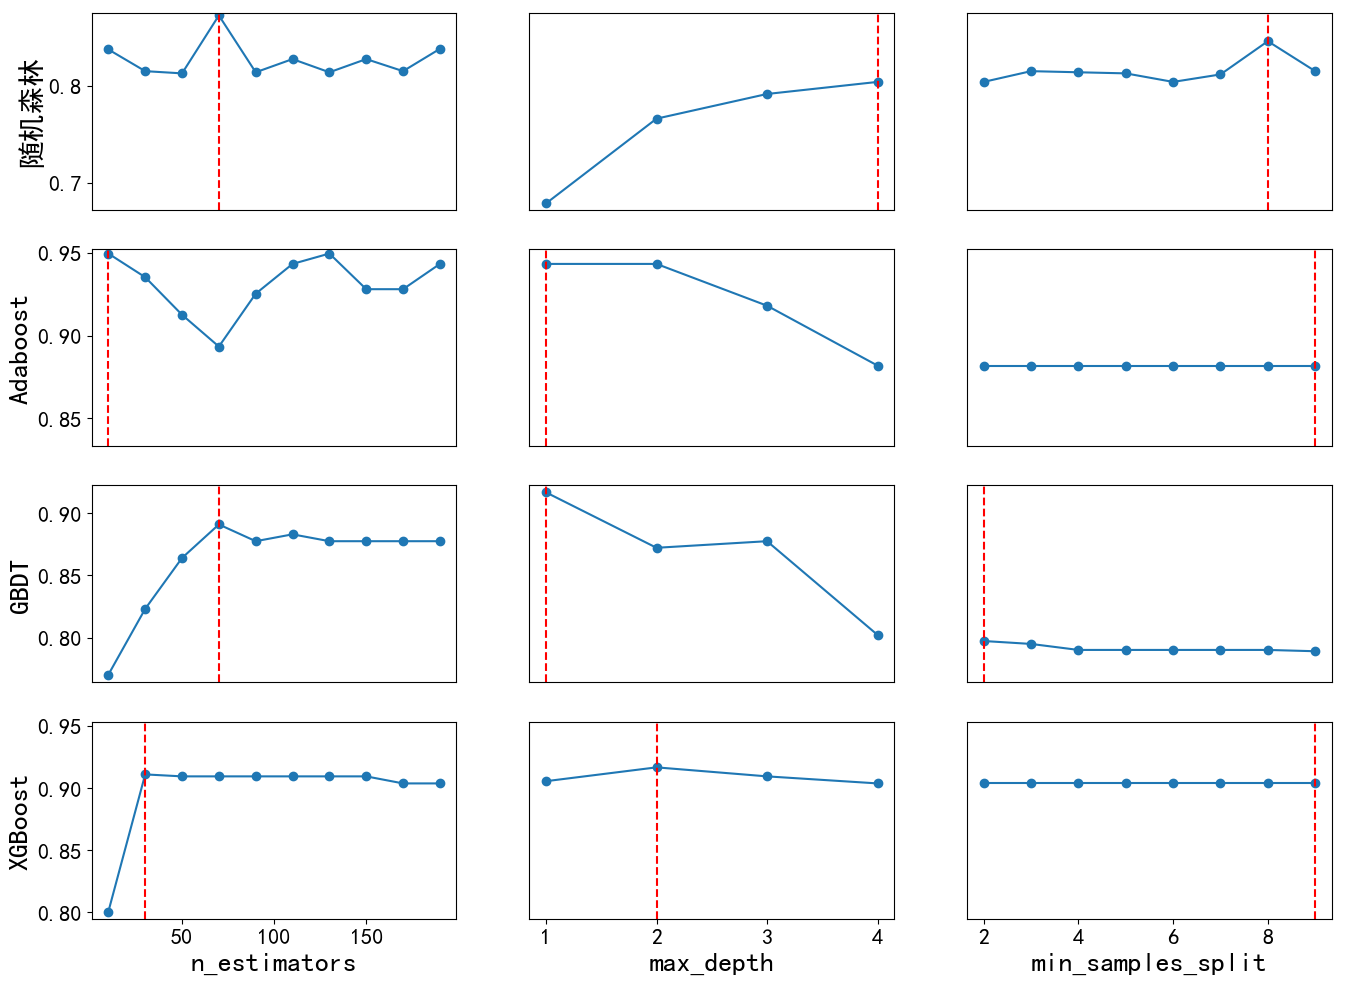

In [116]:
fig, ax = plt.subplots(4, 3, figsize=(16, 12), dpi=100)

r = 0
for model_name, aim_dict in data.items():
    c = 0
    y0 = 1
    y1 = 0
    for param_name, values in aim_dict.items():
        x = values[0]
        y = values[1]
        aim_x = values[2]
        
        ax_temp = ax[r][c]
        
        ax_temp.plot(x, y, 'o-')
        ax_temp.axvline(aim_x, color = "r", linestyle = "dashed")
        if c == 0:
            ax_temp.set_ylabel(model_name, fontsize=20)
            ax_temp.tick_params(axis='y', labelsize=16)
        else:
            ax_temp.set_yticks([])
            
        if r != 3:
            ax_temp.set_xticks([])
        else:
            ax_temp.tick_params(axis='x', labelsize=16)
            ax_temp.set_xlabel(param_name, fontsize=20)
            
        # 获取每个y轴lim，统一设置
        y_lim_aim = ax_temp.get_ylim()
        if y_lim_aim[0] < y0:
            y0 = y_lim_aim[0]
        if y_lim_aim[1] > y1:
            y1 = y_lim_aim[1]
        c += 1
    for i in range(3):
        ax[r][i].set_ylim([y0, y1])
    r += 1
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1)
fig.savefig('./1.jpg', bbox_tight=True)